## Assignment 2 - Aida Zadgari

### Data analysis : car insurance claims
In this assignment, I imported data "insurance_claims" from  Kaggle and analyised it as below:

In [435]:
# import the list of stations
import pandas as pd

# Plot Library
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# Import Widgets and use a widget to filter the information
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact

# importing the datetime module
import datetime
from datetime import datetime

### 1. Import the CSV and Print Dataframe

In [436]:
# No need for a directory path if in the same directory, index_col = 'Year'
df = pd.read_csv("insurance_claims (3).csv")

In [437]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [438]:
# new columns showing year separately for later analysis
df['yearincident'] = pd.DatetimeIndex(df['incident_date']).year
df['monthincident'] = pd.DatetimeIndex(df['incident_date']).month
df['yearpolicy'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['monthpolicy'] = pd.DatetimeIndex(df['policy_bind_date']).month
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,yearincident,monthincident,yearpolicy,monthpolicy
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,NaN,2015,1,2014,10
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,NaN,2015,1,2006,6
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,NaN,2015,2,2000,9
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,NaN,2015,1,1990,5
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,NaN,2015,2,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,61040,Honda,Accord,2006,N,NaN,2015,2,1991,7
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,72320,Volkswagen,Passat,2015,N,NaN,2015,1,2014,1
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,52500,Suburu,Impreza,1996,N,NaN,2015,1,2003,2
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,36540,Audi,A5,1998,N,NaN,2015,2,2011,11


In [439]:
# the number of rows and columns
df.shape

(1000, 44)

In [440]:
# to see the titles for all columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'yearincident',
       'monthincident', 'yearpolicy', 'monthpolicy'],
      dtype='object')

In [441]:
df.head(6)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,yearincident,monthincident,yearpolicy,monthpolicy
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,NaN,2015,1,2014,10
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,NaN,2015,1,2006,6
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,NaN,2015,2,2000,9
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,NaN,2015,1,1990,5
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,NaN,2015,2,2014,6
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,51280,Saab,95,2003,Y,NaN,2015,1,2006,10


In [442]:
df.tail(6)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,yearincident,monthincident,yearpolicy,monthpolicy
994,141,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,...,4860,Honda,Civic,1996,N,NaN,2015,1,2007,3
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,61040,Honda,Accord,2006,N,NaN,2015,2,1991,7
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,72320,Volkswagen,Passat,2015,N,NaN,2015,1,2014,1
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,52500,Suburu,Impreza,1996,N,NaN,2015,1,2003,2
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,36540,Audi,A5,1998,N,NaN,2015,2,2011,11
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,3680,Mercedes,E400,2007,N,NaN,2015,2,1996,11


### 2. Analyzing the data according to total claim amount

>  2.1. The quantity and frequency of claim payments, as well as the locations and factors that led to the majority of claims being paid, are the most crucial factors for insurance firms to consider. Then, we begin to concentrate on the locations where the majority of occurrences have occurred and the greatest amount of payment has been made.

In [443]:
#set incident_state as an index
df.set_index('incident_state', inplace = True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,yearincident,monthincident,yearpolicy,monthpolicy
incident_state,,,,,,,,,,,,,,,,,,,,,
SC,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,NaN,2015,1,2014,10
VA,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,NaN,2015,1,2006,6
NY,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,NaN,2015,2,2000,9
OH,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,NaN,2015,1,1990,5
NY,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,NaN,2015,2,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,61040,Honda,Accord,2006,N,NaN,2015,2,1991,7
SC,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,72320,Volkswagen,Passat,2015,N,NaN,2015,1,2014,1
NC,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,52500,Suburu,Impreza,1996,N,NaN,2015,1,2003,2


In [444]:
# grouping by State and see how many witnessess and how many involved vehicle in each state
df_claims = df.groupby("incident_state")["witnesses","number_of_vehicles_involved",
                                         "total_claim_amount","policy_annual_premium"].sum()
df_claims

C:\Users\Aida\AppData\Local\Temp\ipykernel_8896\3691469565.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_claims = df.groupby("incident_state")["witnesses","number_of_vehicles_involved",


,witnesses,number_of_vehicles_involved,total_claim_amount,policy_annual_premium
incident_state,,,,
NC,154,200,5421230,136251.24
NY,388,497,14773770,328573.78
OH,43,49,1144720,27841.66
PA,42,59,1487150,37132.90
SC,371,454,13538150,307657.91
VA,168,188,5499770,142291.77
WV,321,392,10897150,276656.89


>  2.2. Most "witnesses" belong to NY state and the most "involved vehicles in accidents" belong to NY too. The maximum total_claim_amount has been paid in NY. We can conclude that because there is more accident there, so there are more witnesses and more paid claim amount. .Then, we may examine "policy state" and "sex" and determine why the majority of accidents have occurred there. Additionally, we can determine which NY city has the most accidents.

In [445]:
# compare claim amount to premium amount for each state seperatly and add it to df_claims as a new column "claimtopremium"
# use def function

def claimratio ():
    df_claims['claimtopremium'] = ((df_claims.total_claim_amount/df_claims.policy_annual_premium)*100).round(2)
    return df_claims
claimratio ()

,witnesses,number_of_vehicles_involved,total_claim_amount,policy_annual_premium,claimtopremium
incident_state,,,,,
NC,154,200,5421230,136251.24,3978.85
NY,388,497,14773770,328573.78,4496.33
OH,43,49,1144720,27841.66,4111.54
PA,42,59,1487150,37132.90,4004.94
SC,371,454,13538150,307657.91,4400.39
VA,168,188,5499770,142291.77,3865.14
WV,321,392,10897150,276656.89,3938.87


In [446]:
# calculate the number of claims for each state and add it to df_claims
df.groupby('incident_state')[['total_claim_amount']].count()

,total_claim_amount
incident_state,
NC,110
NY,262
OH,23
PA,30
SC,248
VA,110
WV,217


>  2.3. Considering the amount of claims and premium, we can confirm our first conclusion that NY state has the most loss, the reason we compared the total claim amount for each state with total premium is that sometimes we cannot decide according to claims without considering the premiums, as it is possible that some insured or in this case states has a high loss but also a huge amount of premium, so we can ignore them as a risky insured, when we compare these both amount at the same time, we can have a right decision and look at the claim to premium ratio and select the insured that are really risky. Now we can continue to investigate the possible reasons behind that.

### 3. Analyzing the NY state & dive into more details

In [447]:
#function to filter data for one state
def filter_by_state(state):
    filt = df.index == state
    new_df =df.loc[filt,['age','insured_sex','insured_education_level','policy_state','incident_city','witnesses','number_of_vehicles_involved',
                         "total_claim_amount","policy_annual_premium"]] 
    return new_df

In [448]:
df_state = filter_by_state("NY")
df_state

,age,insured_sex,insured_education_level,policy_state,incident_city,witnesses,number_of_vehicles_involved,total_claim_amount,policy_annual_premium
incident_state,,,,,,,,,
NY,29,FEMALE,PhD,OH,Columbus,3,3,34650,1413.14
NY,44,MALE,Associate,IL,Arlington,1,1,6500,1583.91
NY,34,MALE,PhD,IN,Springfield,0,3,78650,1333.35
NY,42,FEMALE,Masters,OH,Northbend,2,1,87010,1253.12
NY,26,MALE,College,OH,Riverwood,2,3,52110,1199.44
...,...,...,...,...,...,...,...,...,...
NY,44,MALE,College,OH,Northbend,2,3,61100,1188.51
NY,43,MALE,High School,IN,Arlington,3,3,51900,1101.83
NY,46,FEMALE,High School,IN,Columbus,1,1,60700,1672.88


In [449]:
# Get a list of unique states
state_list = list(df.index.unique())
#print(state_list)
# Use widgets to interact with the list of states
widgets.interact(filter_by_state, state = state_list)

interactive(children=(Dropdown(description='state', options=('SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'), value=…

<function __main__.filter_by_state(state)>

In [450]:
# Grouping by state and city
df_NY_group = df_state.groupby(['incident_state','incident_city'])['witnesses',"number_of_vehicles_involved",
                                                                  "total_claim_amount","policy_annual_premium"].sum()
# Use function for calculing the claim to premium ratio
def claimratio2 ():
    df_NY_group['claimtopremium2'] = ((df_NY_group.total_claim_amount/df_NY_group.policy_annual_premium)*100).round(2)
    return df_NY_group
claimratio2 ()

# Use highlight for max values
df_NY_group.style.highlight_max(color = 'lightgreen', axis = 0)

C:\Users\Aida\AppData\Local\Temp\ipykernel_8896\1072776821.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_NY_group = df_state.groupby(['incident_state','incident_city'])['witnesses',"number_of_vehicles_involved",


>  3.1. As I explained in section 2.3, we can see the total claim amount for Columbus is the largest amount, but considering premiums we can conclude that Riverwood is a the riskiest city in NY.

### 4. Let's do some analysis for insured characteristics in NY and Riverwood

In [451]:
# grouping the 'df_state' by gender
A=df_state.groupby('insured_sex')[['total_claim_amount','policy_annual_premium','number_of_vehicles_involved']].sum().round(2)
# add Total row to table
total  = A.sum(numeric_only = True)  
total.name = 'Total'
A2 = A.append(total.transpose())
# calculating percentage column
A2['percentage'] = ((A2.number_of_vehicles_involved/497)*100).round(2)
A2

C:\Users\Aida\AppData\Local\Temp\ipykernel_8896\1267072702.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A2 = A.append(total.transpose())


,total_claim_amount,policy_annual_premium,number_of_vehicles_involved,percentage
insured_sex,,,,
FEMALE,7825200.0,171823.43,258.0,51.91
MALE,6948570.0,156750.35,239.0,48.09
Total,14773770.0,328573.78,497.0,100.00


In [452]:
df_state.groupby('insured_sex')[['insured_sex']].count()

,insured_sex
insured_sex,
FEMALE,138
MALE,124


In [453]:
B = df_state.groupby('insured_education_level')[['insured_education_level']].count()
total  = B.sum(numeric_only = True)
total.name = 'Total'
B2 = B.append(total.transpose())
# calculating percentage column
B2['percentage2'] = ((B2.insured_education_level/262)*100).round(2)
B2

C:\Users\Aida\AppData\Local\Temp\ipykernel_8896\551277436.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B2 = B.append(total.transpose())


,insured_education_level,percentage2
insured_education_level,,
Associate,39,14.89
College,29,11.07
High School,45,17.18
JD,42,16.03
MD,35,13.36
Masters,45,17.18
PhD,27,10.31
Total,262,100.00


In [454]:
age_groups = [0, 17, 25, 35, 45, 55, 100]
age_group_names = ['<17','17-25', '25-35', '35-45', '45-55','>55']
df_state['Age group'] = pd.cut(df_state['age'],bins=age_groups, labels=age_group_names)
df_state.groupby('Age group')[['age']].count()

,age
Age group,
<17,0
17-25,10
25-35,91
35-45,98
45-55,46
>55,17


>  As we see, Female insured (51.91%) are more than male insured(48.09%), consequently, the number of accidents are more and the claims amount and policy amount are more too, then we cannot conclude that women are more careless or find it as the main reason for the high loss in NY. Considering the education level, more than 50% of the insured have a high level of education. The age of most insured is between 25-35 and 35-45, maybe it can be a reason for losses. We can do more filters on data as below to see more detail about these two age groups.

In [455]:
# Get all the insured in NY who are more than 50 years old
#(df_state['insured_sex'] =='MALE') & 
filt = (df_state['age']> 25)&(df_state['age']< 45)&(df_state['number_of_vehicles_involved']>1)
df_state[filt]

,age,insured_sex,insured_education_level,policy_state,incident_city,witnesses,number_of_vehicles_involved,total_claim_amount,policy_annual_premium,Age group
incident_state,,,,,,,,,,
NY,29,FEMALE,PhD,OH,Columbus,3,3,34650,1413.14,25-35
NY,34,MALE,PhD,IN,Springfield,0,3,78650,1333.35,25-35
NY,26,MALE,College,OH,Riverwood,2,3,52110,1199.44,25-35
NY,35,FEMALE,Associate,IL,Arlington,3,3,29790,1088.34,25-35
NY,30,MALE,High School,IL,Hillsdale,2,3,77110,1558.29,25-35
...,...,...,...,...,...,...,...,...,...,...
NY,38,FEMALE,College,IL,Northbrook,3,3,57200,1381.14,35-45
NY,37,FEMALE,Masters,IL,Columbus,3,3,48780,1115.81,35-45
NY,34,FEMALE,JD,IL,Northbend,2,3,57200,1429.96,25-35


## 5. Statistical Analysis

>  With the help of df.max(), we are able to take a broad view and see the most significant data for each column. For example, we have a customer with 479 months, and the oldest customer is 64. The highest level of education is a Ph.D., and Springfield city has experienced the most accidents. Males are more likely to have accidents than females are, and......
Also we can see the maximum auto year is for 2015 and the incident date is for 2015-03-01 that use them later.

In [456]:
df.max()

months_as_customer                          479
age                                          64
policy_number                            999435
policy_bind_date                     2015-02-22
policy_state                                 OH
policy_csl                             500/1000
policy_deductable                          2000
policy_annual_premium                   2047.59
umbrella_limit                         10000000
insured_zip                              620962
insured_sex                                MALE
insured_education_level                     PhD
insured_occupation             transport-moving
insured_hobbies                        yachting
insured_relationship                       wife
capital-gains                            100500
capital-loss                                  0
incident_date                        2015-03-01
incident_type                     Vehicle Theft
collision_type                   Side Collision
incident_severity                Trivial

In [457]:
#descriptive statistic: we can have an overall look to the data
df[['policy_annual_premium','total_claim_amount','injury_claim','property_claim','vehicle_claim']].describe().round(2)

,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1256.41,52761.94,7433.42,7399.57,37928.95
std,244.17,26401.53,4880.95,4824.73,18886.25
min,433.33,100.00,0.00,0.00,70.00
25%,1089.61,41812.50,4295.00,4445.00,30292.50
50%,1257.20,58055.00,6775.00,6750.00,42100.00
75%,1415.70,70592.50,11305.00,10885.00,50822.50
max,2047.59,114920.00,21450.00,23670.00,79560.00


>  Sample explanation: policy annual premium mean is 1256 with the max of 2047 and the min of 433. The total claim amount has a mean of 52761 , the max of 21450 and the min of 100. The mean of total claim is much more than the mean of total premium.

## 6. Changing the Index & do some other analysis

In [458]:
# reset the state index and make a new index base on policy_number
df.reset_index(inplace = True)
# Make the policy_number the index value, in insurance firms the policynumber is a uniq code for customers
df.set_index('policy_number', inplace = True)
df

,incident_state,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,yearincident,monthincident,yearpolicy,monthpolicy
policy_number,,,,,,,,,,,,,,,,,,,,,
521585,SC,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,NaN,2015,1,2014,10
342868,VA,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,NaN,2015,1,2006,6
687698,NY,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,NaN,2015,2,2000,9
227811,OH,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,NaN,2015,1,1990,5
367455,NY,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,NaN,2015,2,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941851,NC,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,61040,Honda,Accord,2006,N,NaN,2015,2,1991,7
186934,SC,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,72320,Volkswagen,Passat,2015,N,NaN,2015,1,2014,1
918516,NC,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,52500,Suburu,Impreza,1996,N,NaN,2015,1,2003,2


In [459]:
# to see the data for a specific policy number we can use .loc, loc considers rows based on index labels
# for policy number:941851 the details are as below:
df.loc[941851]

incident_state                                       NC
months_as_customer                                    3
age                                                  38
policy_bind_date                             1991-07-16
policy_state                                         OH
policy_csl                                     500/1000
policy_deductable                                  1000
policy_annual_premium                            1310.8
umbrella_limit                                        0
insured_zip                                      431289
insured_sex                                      FEMALE
insured_education_level                         Masters
insured_occupation                         craft-repair
insured_hobbies                               paintball
insured_relationship                          unmarried
capital-gains                                         0
capital-loss                                          0
incident_date                                201

In [460]:
# to see the incident date or any other information for a specific policy number
df.loc[941851, 'incident_date']

'2015-02-22'

### *How would be the relation between customer with more months and total_claim_amount:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


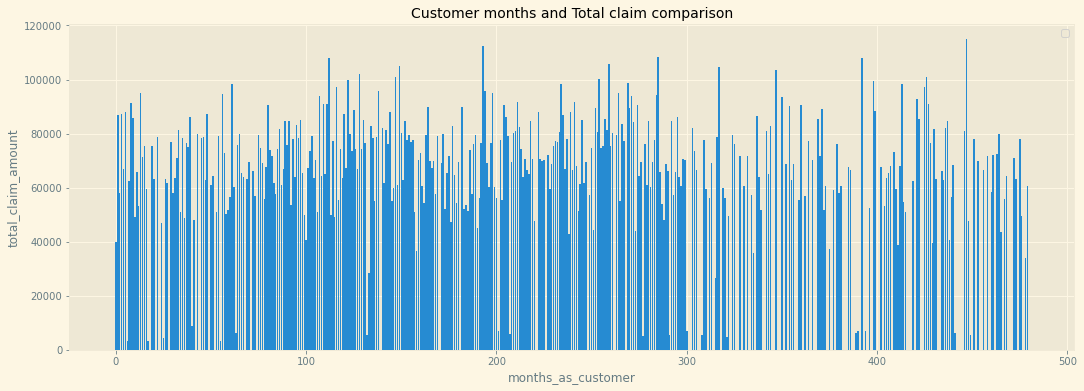

In [461]:
plt.rcParams['figure.figsize'] = [18, 6]
plt.title('Customer months and Total claim comparison', size=14)
plt.xlabel('months_as_customer')
plt.ylabel('total_claim_amount')
#Plot the graph
plt.bar(df.months_as_customer, df.total_claim_amount)
plt.legend()

In [462]:
# analyse according to the auto modelyear
df
auto_years = [1900, 2000, 2005, 2010, 2015]
Autoyear_names = ['<1900', '1900-2000', '2005-2010' ,'>2010']
df['Auto year'] = pd.cut(df['auto_year'],bins=auto_years, labels=Autoyear_names)
df.groupby('Auto year')[['auto_year']].count()

,auto_year
Auto year,
<1900,276
1900-2000,235
2005-2010,250
>2010,239


>  The above result shows 75% of autos have more than 5 years, maybe we can conclude that old cars can cause more accidents.

>  According to the plot, we cannot confirm our hypothesis because even insured with more months can experience significant losses. The hypothesis for plotting the aforementioned relation was that: customers with more months (older customers) can be more sensitive to their insurance records and thus cause fewer damages. We also created a "pairplot" as shown below for more assurance, and we can say with certainty that there is not a direct and clear relation between these 2 varibles and maybe the nonlinear link is now more obvious.

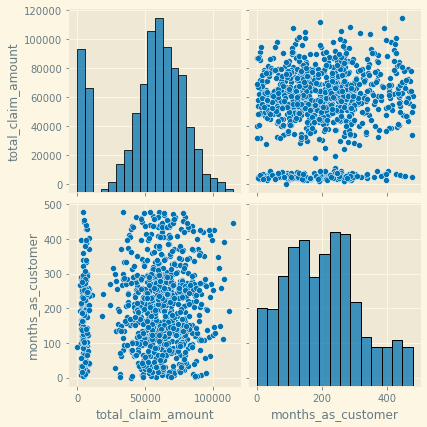

In [463]:
X = df['months_as_customer']
y = df['total_claim_amount']
# Visualize the data using scatter plot and histogram #  import seaborn as sns and use pairplot() function
sns.set_palette('colorblind') #build color palettes 
#sns.pairplot(data=df, height=3)
sns.pairplot(df[['total_claim_amount', 'months_as_customer']], height=3) 

### *Compare total amount of claims for different years and different types, using plot

In [464]:
# use double square brackets [[]] to select multiple columns from the data=df
df.reset_index(inplace = True)
df.set_index('policy_number', inplace = True)
df_year = df[['incident_date','total_claim_amount','injury_claim','property_claim','vehicle_claim']]
# add Total row to table
total  = df_year.sum(numeric_only = True)  
total.name = 'Total'
df_year2 = df_year.append(total.transpose())
df_year2

C:\Users\Aida\AppData\Local\Temp\ipykernel_8896\778824004.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_year2 = df_year.append(total.transpose())


,incident_date,total_claim_amount,injury_claim,property_claim,vehicle_claim
policy_number,,,,,
521585,2015-01-25,71610,6510,13020,52080
342868,2015-01-21,5070,780,780,3510
687698,2015-02-22,34650,7700,3850,23100
227811,2015-01-10,63400,6340,6340,50720
367455,2015-02-17,6500,1300,650,4550
...,...,...,...,...,...
186934,2015-01-24,108480,18080,18080,72320
918516,2015-01-23,67500,7500,7500,52500
533940,2015-02-26,46980,5220,5220,36540


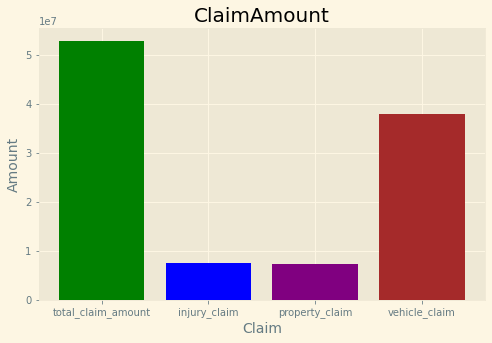

In [465]:
Data = {'Claim': ['total_claim_amount','injury_claim','property_claim','vehicle_claim'],
        'Amount':  [52761940, 7433420, 7399570, 37928950]
       }
dfclaimamount = pd.DataFrame(Data,columns=['Claim','Amount'])
plt.rcParams['figure.figsize'] = [8, 5] # set the size of your graph
plt.style.use('Solarize_Light2') # style
New_Colors = ['green','blue','purple','brown']
plt.bar(dfclaimamount['Claim'], dfclaimamount['Amount'], color=New_Colors)
plt.title('ClaimAmount', fontsize=20)
plt.xlabel('Claim', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.grid(True)
plt.show()

>  We may infer that the majority of claim payouts are for car claims, and the amounts for property damage and personal injury are roughly equal.

### *Do some analysis according to totaclaim, totalpremium and year

>  The results shown below lead us to the conclusion that the majority of accidents occurred in the first month of 2015, up to this point. The highest premium, $72484.72, belongs to the year 1991, and the lowest premium, 1998. However, since we are currently in 2015, we are unable to draw any conclusions about this year.

In [466]:
df
df_year1 = df.groupby(['yearincident','monthincident'])['total_claim_amount'].sum()
df_year1

yearincident  monthincident
2015          1                27760970
              2                24326250
              3                  674720
Name: total_claim_amount, dtype: int64

In [467]:
df_year3 = df.groupby(['yearpolicy','monthpolicy'])['policy_annual_premium'].sum()
df_year3

yearpolicy  monthpolicy
1990        1              1934.92
            2              8692.24
            3              6855.12
            4              1123.89
            5              6984.31
                            ...   
2014        10             2490.63
            11             3994.29
            12             5085.10
2015        1              2754.99
            2               973.50
Name: policy_annual_premium, Length: 286, dtype: float64

In [468]:
df_year2 = df.groupby('yearpolicy')['policy_annual_premium'].sum()
df_year2 

yearpolicy
1990    58417.44
1991    72484.72
1992    61137.84
1993    41504.54
1994    51378.42
1995    51046.04
1996    55006.26
1997    53832.69
1998    36331.33
1999    49286.55
2000    38570.17
2001    50548.53
2002    62948.48
2003    45102.10
2004    45632.56
2005    48172.14
2006    50334.44
2007    48557.18
2008    42034.15
2009    56257.68
2010    49391.62
2011    39299.17
2012    45895.67
2013    44973.87
2014    54534.07
2015     3728.49
Name: policy_annual_premium, dtype: float64

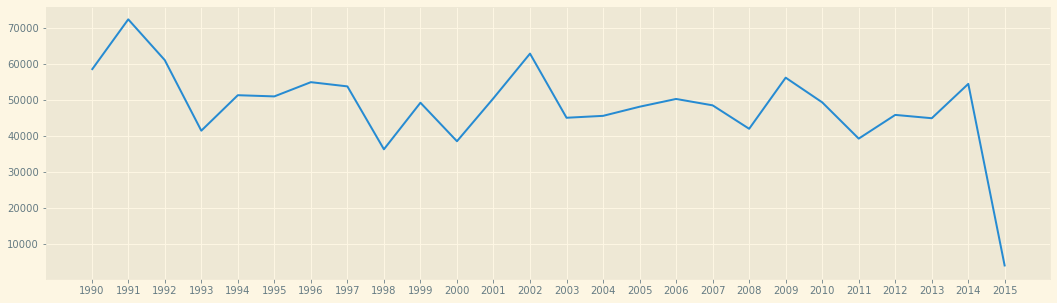

In [469]:
dev_x=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004',
      '2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
dev_y=[58417.44, 72484.72, 61137.84,  41504.54, 51378.42, 51046.04,  55006.26, 53832.69, 36331.33, 
       49286.55, 38570.17,50548.53,62948.48,45102.10,45632.56,48172.14,50334.44,48557.18,42034.15,
       56257.68,49391.62,39299.17,45895.67,44973.87,54534.07,3728.49]
plt.rcParams['figure.figsize'] = [18, 5]
plt.plot(dev_x, dev_y)

In [470]:
# use double square brackets [[]] to select multiple columns from the data=df
df1 = df[['yearpolicy','age','insured_sex','policy_annual_premium','total_claim_amount']]
df1

,yearpolicy,age,insured_sex,policy_annual_premium,total_claim_amount
policy_number,,,,,
521585,2014,48,MALE,1406.91,71610
342868,2006,42,MALE,1197.22,5070
687698,2000,29,FEMALE,1413.14,34650
227811,1990,41,FEMALE,1415.74,63400
367455,2014,44,MALE,1583.91,6500
...,...,...,...,...,...
941851,1991,38,FEMALE,1310.80,87200
186934,2014,41,FEMALE,1436.79,108480
918516,2003,34,FEMALE,1383.49,67500


In [471]:
df1.shape

(1000, 5)


<img src="images/the_end.png" alt="The End" width="300" align="center"/></div>